# Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loding the dataset
data = pd.read_csv("data_news.csv")
data.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [5]:
#some info about the dataset
print("Information about the data:")
data.info()

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


# Data collection and preprocessing

In [10]:
# Now i will check for the missing values in the dataset
print("Checking for the missing values:")
data.isnull().sum()

Checking for the missing values:


category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64

# From the above result i have concluded that the keywords column contains 2668 missing values

In [13]:
print("\nArticle Counts by Category:")
print(data['category'].value_counts())


Article Counts by Category:
category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64


In [15]:
### Task 1.1: Collect a dataset of labeled news articles (sports, politics, technology etc)

In [17]:
sports_articles = data[data['category'] == 'SPORTS']
print("Sports Articles are:")
sports_articles.head()

Sports Articles are:


,category,headline,links,short_description,keywords
45000,SPORTS,"Corey Dickerson Hits Double On Bounce Pitch, L...",https://www.huffingtonpost.com/entry/corey-dic...,Rockies outfielder Corey Dickerson got fooled ...,corey-dickerson-double-bounce-pitch
45001,SPORTS,The Least Creative Nicknames In Sports History,https://www.huffingtonpost.comhttp://bleacherr...,"One of the perks of being an athlete, or just ...",NaN
45002,SPORTS,Hope Solo Stars As U.S. Women's Soccer Beats F...,https://www.huffingtonpost.com/entry/uswnt-fra...,Solo kept France scoreless as the Americans ea...,uswnt-france-hope-solo-rio-olympics
45003,SPORTS,"Giants Offense Cruise Past Royals, Even Series",https://www.huffingtonpost.com/entry/giants-of...,The Giants leadoff batter Blanco was issued a ...,giants-offense-cruise-pas
45004,SPORTS,Tom Brady Has This Wish For Radio Host Who Ins...,https://www.huffingtonpost.com/entry/tom-brady...,The Patriots quarterback addressed the situati...,tom-brady-radio-host-insulted-daughter


In [19]:
sports_articles.to_csv("sports_articles.csv", index=False)
#### This above code has saved the processed result in a new csv file named sports_articles.csv

In [21]:
politics_articles = data[data['category'] == 'POLITICS']
print("Polictics Articles are:")
politics_articles.head()

Polictics Articles are:


,category,headline,links,short_description,keywords
5000,POLITICS,GOP Congressman Suggests Looser Standard Of Pr...,https://www.huffingtonpost.com/entry/zeldin-mu...,"Rep. Lee Zeldin says there needs to be ""some t...",zeldin-muslims-reasonable-suspicion
5001,POLITICS,The ACLU Is Suing To Strike Down Ohio's Congre...,https://www.huffingtonpost.com/entry/ohio-cong...,The civil liberties group says Ohio's map is s...,ohio-congressional-map-gerrymandering
5002,POLITICS,Don't Like The New Climate Rules? Thank Congress.,https://www.huffingtonpost.com/entry/congress-...,Legislators could have passed a climate change...,congress-climate-rules-emissions
5003,POLITICS,The Story Behind An Iconic Picture Of Civil Ri...,https://www.huffingtonpost.com/entry/how-julia...,An often-forgotten battle for free speech righ...,how-julian-bond-fought-georgia-all-the-way-to-...
5004,POLITICS,Pro-Abortion Rights Progressive Wins Nebraska ...,https://www.huffingtonpost.com/entry/kara-east...,Kara Eastman prevailed against an establishmen...,kara-eastman-wins-nebraska-democratic-primary


In [23]:
politics_articles.to_csv("politics_articles.csv", index=False)
#### This above code has saved the processed result in a new csv file named politics_articles.csv

In [25]:
travel_articles = data[data['category'] == 'TRAVEL']
print("Travel Articles are:")
travel_articles.head()

Travel Articles are:


,category,headline,links,short_description,keywords
15000,TRAVEL,Remembering Christopher McCandless 20 Years Later,https://www.huffingtonpost.com/entry/rememberi...,"Discussions of McCandless' life, either throug...",remembering-christopher-mccandless
15001,TRAVEL,Start Stop (the Scott Expedition - Day 15) - 1...,https://www.huffingtonpost.com/entry/start-sto...,We woke to the same conditions and it was my t...,start-stop-day-15-100-mil
15002,TRAVEL,Google Maps Just Got An Awesome New Update You...,https://www.huffingtonpost.com/entry/google-ma...,Travelers are going to love this one.,google-maps-update
15003,TRAVEL,Why London Is the World's Most Stimulating City,https://www.huffingtonpost.com/entry/london-tr...,"I currently live in Los Angeles, by way of New...",london-travel-visit
15004,TRAVEL,Smart Travel Advice: Don't 'Micromanage' Your ...,https://www.huffingtonpost.com/entry/smart-tra...,"He's walked across Israel, bicycled across Bur...",smart-travel-advice


In [27]:
travel_articles.to_csv("travel_articles.csv", index=False)
#### This above code has saved the processed result in a new csv file named travel_articles.csv

### Task 1.2:Clean and preprocess the text data.

In [30]:
#### As i have already found out that there are missing values in the keywords column. So i will drop those rows with missing values for simplicity.


In [32]:
data = data.dropna()
#The above code will drop all the rows with missing values for simplicity.

In [34]:
data['keywords'] = data['keywords'].fillna('')
# The above code is used to replace missing values with empty strings and ensure text format.

In [38]:
if 'keywords' in data.columns:
    data['keywords'] = data['keywords'].str.lower()  # Convert to lowercase
    data['keywords'] = data['keywords'].str.replace('[^a-zA-Z]', ' ', regex=True)  # Remove special characters
    data['keywords'] = data['keywords'].str.replace(r'\+', ' ', regex=True)  # Replace '+' with a space

In [40]:
print("\nArticle Counts by Category having no missing values in kewywords column:")
print(data['category'].value_counts())


Article Counts by Category having no missing values in kewywords column:
category
TRAVEL            4865
FOOD & DRINK      4863
ENTERTAINMENT     4855
WORLD NEWS        4851
SPORTS            4759
WELLNESS          4741
POLITICS          4712
STYLE & BEAUTY    4708
BUSINESS          4512
PARENTING         4466
Name: count, dtype: int64


In [ ]:
#### Task 1.2: The cleaning of data has been done successfully

In [42]:
## Task 2: Feature Extraction

In [44]:
### Task 2.1:  Usemethods like TF-IDF, word embeddings (e.g., Word2Vec, GloVe), or bag-of-words to convert text data into numerical features.

In [46]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['keywords']).toarray()
y = data['category']

In [48]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# bag-of-words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=500)
# Fit and transform the text data
text_data = data['keywords'].fillna('').astype(str) 
bow_features = vectorizer.fit_transform(text_data)

In [52]:
from gensim.models import Word2Vec
import numpy as np

# Tokenize text data into sentences of words
tokenized_data = [sentence.lower().split() for sentence in text_data]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Convert each sentence into a vector by averaging word embeddings
word2vec_features = np.array([np.mean([model.wv[word] for word in sentence if word in model.wv] or [np.zeros(100)], axis=0) for sentence in tokenized_data])

# Display the resulting feature vectors
print(word2vec_features)

[[-3.32558453e-02  1.10715613e-01  4.01827633e-01 ... -1.29678905e-01
  -2.83067048e-01  1.12117909e-01]
 [-8.65548998e-02  1.02350257e-01  6.40441060e-01 ... -1.06031954e-01
  -3.86722833e-01  8.77995640e-02]
 [ 4.32617590e-03  5.67702204e-02  2.85621315e-01 ... -1.14722818e-01
  -1.99054927e-01  8.23486000e-02]
 ...
 [-3.19604384e-04  7.54238740e-02  3.09817106e-01 ... -1.32851928e-01
  -2.09658146e-01  8.57935920e-02]
 [-1.13630453e-02  4.60333079e-02  2.46166542e-01 ... -8.09977874e-02
  -1.51606783e-01  4.39359546e-02]
 [-4.54575345e-02  1.57004327e-01  6.95488036e-01 ... -2.47251198e-01
  -3.90574396e-01  1.19658031e-01]]


In [56]:
# Convert to an array or DataFrame for inspection
bow_array = bow_features.toarray()
feature_names = vectorizer.get_feature_names_out()

In [58]:
# Display as DataFrame
bow_df = pd.DataFrame(bow_array, columns=feature_names)
print(bow_df)

       about  abuse  ad  advice  after  against  age  air  airlines  airport  \
0          0      0   0       0      0        0    0    0         0        0   
1          0      0   0       0      0        0    0    0         0        0   
2          0      0   0       0      0        0    0    0         0        0   
3          0      0   0       0      0        0    0    0         0        0   
4          0      0   0       0      0        0    0    0         0        0   
...      ...    ...  ..     ...    ...      ...  ...  ...       ...      ...   
47327      0      0   0       0      0        0    0    0         0        0   
47328      0      0   0       0      0        0    0    0         0        0   
47329      0      0   0       0      0        0    0    0         0        0   
47330      0      0   0       0      0        0    0    0         0        0   
47331      0      0   0       0      0        0    0    0         0        0   

       ...  world  worlds  worst  year 

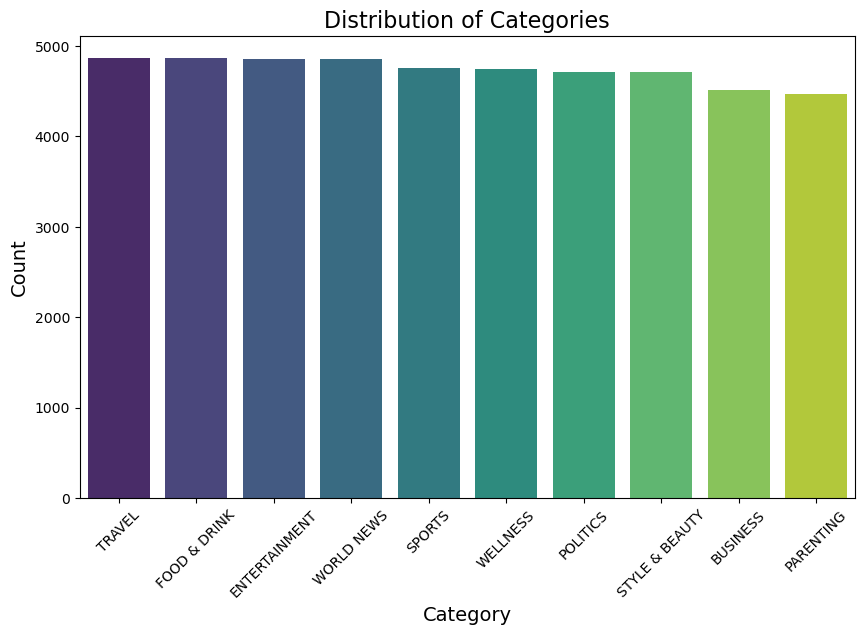

In [60]:
### Task 2.2: Perform exploratory data analysis (EDA) to understand the distribution of different categories.

# Display category distribution as a bar chart
category_counts = data['category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

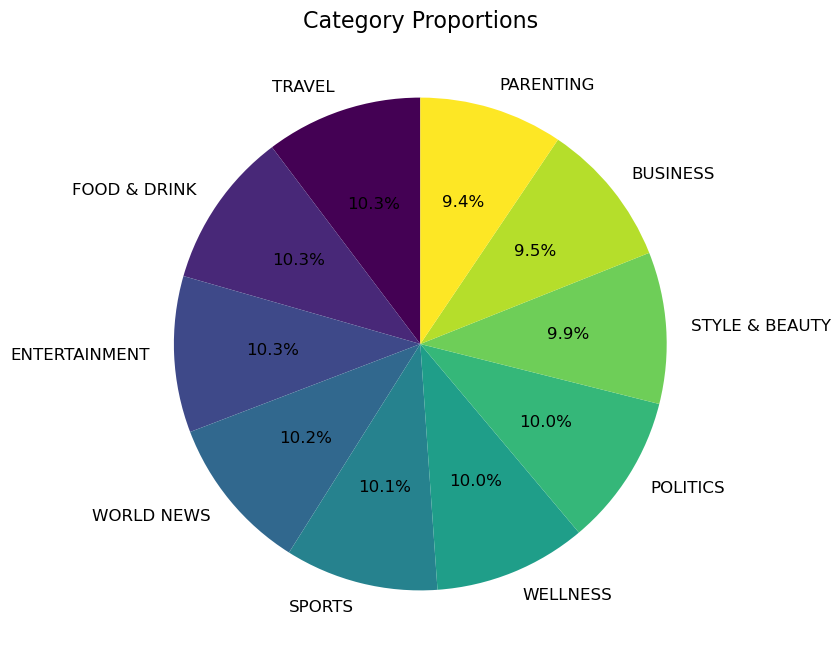

In [62]:
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', fontsize=12)
plt.title('Category Proportions', fontsize=16)
plt.ylabel('')  # Remove y-label
plt.show()

In [64]:
## Task 3: Model Development and Training

In [66]:
### Task 3.1:  Build classification models using algorithms like Logistic Regression, Naive Bayes, Support Vector Machines (SVM).

models = {'Logistic Regression': LogisticRegression(max_iter=1000), 
          'Naive Bayes': MultinomialNB()

}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")


Training Logistic Regression...
Logistic Regression Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.60      0.67      0.63       908
 ENTERTAINMENT       0.65      0.69      0.67       923
  FOOD & DRINK       0.80      0.71      0.75       987
     PARENTING       0.68      0.59      0.63       900
      POLITICS       0.70      0.66      0.68       955
        SPORTS       0.79      0.83      0.81       968
STYLE & BEAUTY       0.81      0.74      0.77       903
        TRAVEL       0.63      0.67      0.65       958
      WELLNESS       0.64      0.73      0.68       969
    WORLD NEWS       0.77      0.73      0.75       996

      accuracy                           0.70      9467
     macro avg       0.71      0.70      0.70      9467
  weighted avg       0.71      0.70      0.70      9467

Logistic Regression Accuracy: 0.7041301362628076

Training Naive Bayes...
Naive Bayes Classification Report:
                 precision 

In [68]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Initialize the SVM model
svm_model = LinearSVC(max_iter=1000, C=0.1)

# Train the model 
svm_model.fit(X_train, y_train)

# Make predictions on the basis of y_pred variable
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred))
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

SVM Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.61      0.66      0.63       908
 ENTERTAINMENT       0.66      0.69      0.68       923
  FOOD & DRINK       0.80      0.72      0.76       987
     PARENTING       0.68      0.60      0.64       900
      POLITICS       0.72      0.66      0.69       955
        SPORTS       0.78      0.84      0.81       968
STYLE & BEAUTY       0.80      0.74      0.77       903
        TRAVEL       0.62      0.66      0.64       958
      WELLNESS       0.64      0.74      0.69       969
    WORLD NEWS       0.76      0.73      0.74       996

      accuracy                           0.71      9467
     macro avg       0.71      0.70      0.70      9467
  weighted avg       0.71      0.71      0.71      9467

SVM Accuracy: 0.7051864370972853


In [70]:
### Task 3.2: Train the models on the preprocessed text data, tuning hyperparameters as necessary.
from sklearn.model_selection import GridSearchCV

# Split of the data into training and testing sets already done
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
subset_size = 200  # Use only 200 samples for tuning (adjust based on dataset size)
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
# Define models and hyperparameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=200),
        'params': {'C': [1]}
    },
    'Naive Bayes': {
        'model': MultinomialNB(),
        'params': {'alpha': [1.0]}
    }
    
}

# Function for model training and hyperparameter tuning
def train_and_tune_model(model_name, model, param_grid, X_train, y_train):
    print(f"\nTraining and tuning {model_name}...")

    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)
    
    # Get best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f"Best Parameters for {model_name}: {best_params}")
    
    # Return the trained model
    return best_model

In [72]:
# Train and tune each model
best_models = {}
for model_name, model_info in models.items():
    best_model = train_and_tune_model(model_name, model_info['model'], model_info['params'], X_train, y_train)
    best_models[model_name] = best_model


Training and tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 1}

Training and tuning Naive Bayes...
Best Parameters for Naive Bayes: {'alpha': 1.0}


In [74]:
### Task 3.3: Use cross-validation to ensure robust evaluation of model performance.

# Loop through models and evaluate using cross-validation

for model_name, model_info in models.items():
    model = model_info['model']  # Extract the model object
    scores = cross_val_score(model, X, y, cv=2)  # Perform cross-validation
    print(f"\n{model_name} Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


Logistic Regression Cross-Validation Accuracy: 0.67 (+/- 0.00)

Naive Bayes Cross-Validation Accuracy: 0.67 (+/- 0.00)


#### The above results are came out by using the cross validation technique A cross-validation accuracy of 67% is not necessarily bad, but it may not be sufficient for high-stakes applications.

## Task 4: Model Evaluation

In [79]:
### Task 4.1:  Evaluate the models using appropriate metrics.

from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate models
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


Evaluating Logistic Regression...
Accuracy: 0.70
Precision: 0.71
Recall: 0.70
F1-Score: 0.70
Confusion Matrix:
 [[607  32  23  31  55  20  10  49  53  28]
 [ 28 638  12  44  39  33  43  37  25  24]
 [ 38  35 701  20  15  13  27  66  62  10]
 [ 57  56  21 535  30  29  23  45  94  10]
 [ 80  29   5  26 632  48   8  37  25  65]
 [ 11  28   6  13  28 805   6  23  27  21]
 [ 20  74  13  16  15  11 665  26  51  12]
 [ 55  40  48  31  26  19  24 645  35  35]
 [ 54  21  37  55  12  14  12  40 712  12]
 [ 59  24   7  15  52  22   7  55  29 726]]

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.60      0.67      0.63       908
 ENTERTAINMENT       0.65      0.69      0.67       923
  FOOD & DRINK       0.80      0.71      0.75       987
     PARENTING       0.68      0.59      0.63       900
      POLITICS       0.70      0.66      0.68       955
        SPORTS       0.79      0.83      0.81       968
STYLE & BEAUTY       0.81      0.74   

In [81]:
### Task 4.2: Comparethe performance of different models and select the best one for classification.

best_model = LogisticRegression(max_iter=200)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

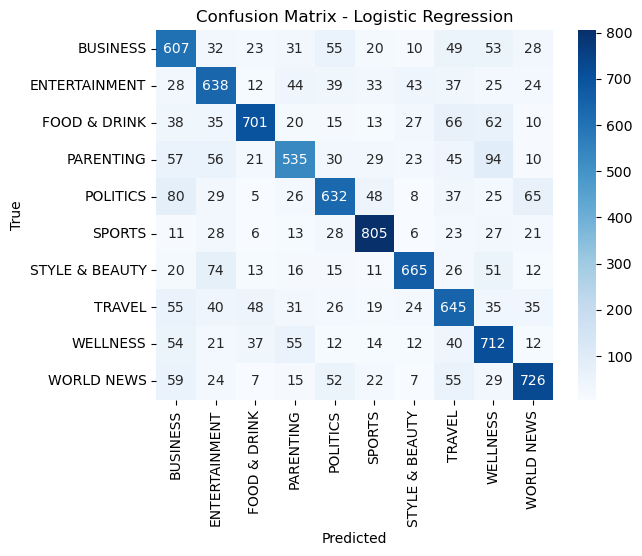


Final Logistic Regression Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.60      0.67      0.63       908
 ENTERTAINMENT       0.65      0.69      0.67       923
  FOOD & DRINK       0.80      0.71      0.75       987
     PARENTING       0.68      0.59      0.63       900
      POLITICS       0.70      0.66      0.68       955
        SPORTS       0.79      0.83      0.81       968
STYLE & BEAUTY       0.81      0.74      0.77       903
        TRAVEL       0.63      0.67      0.65       958
      WELLNESS       0.64      0.73      0.68       969
    WORLD NEWS       0.77      0.73      0.75       996

      accuracy                           0.70      9467
     macro avg       0.71      0.70      0.70      9467
  weighted avg       0.71      0.70      0.70      9467



In [83]:
# Creation of confusion matrix to provide final logistic regression report.
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
# Now i will display the results of the classification report
print("\nFinal Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_best))